<a href="https://colab.research.google.com/github/sidharthofficial/Dog-Breed-Prediction-DL-/blob/master/end_to_end_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Transfer learning and TensorFlow 2.0 to identify the various breeds of dogs

In this project we're going to use machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification](https://www.kaggle.com/c/dog-breed-identification/overview) competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This is a multi-class image classification problem. In the end we would be predicting probabilities of am image being of a certain class. 

The steps followed will be:
1. Turning the data into tensors(numbers)
2. Preparing the data(split into train and valid sets and also split X and y.
3. Choose a model from tensorflow hub(transfer learning) and fit and train the model(creating callbacks(early stopping and tensorboard))
4. Evaluate the model(training on a small dataset)
5. Improve the model(training on full dataset)
6. Find the accuracy of the model(on test dataset)
7. Custom image prediction

In [ ]:
#!unzip 'drive/My Drive/DogVision/dog-breed-identification.zip' -d 'drive/My Drive/DogVision'

In [ ]:
#import tensorflow
import tensorflow as tf
print('TF version:', tf.__version__)

#import tensorflow hub
import tensorflow_hub as hub
print("TF hub version:", hub.__version__)

TF version: 2.2.0
TF hub version: 0.8.0


In [ ]:
print('GPU', 'available Yes!' if tf.config.list_physical_devices('GPU') else 'not available')

GPU available Yes!


##Preparing the data

The labels(filenames) are present in the 'labels.csv' file and the images are present in the test and train folders

###Accessing the data

In [ ]:
import pandas as pd
#check the labels(filename) of our data
labels_csv = pd.read_csv('drive/My Drive/DogVision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     cfaf6ea651f31e1ab10d384b84cebff1  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


(scottish_deerhound      126
 maltese_dog             117
 afghan_hound            116
 entlebucher             115
 bernese_mountain_dog    114
                        ... 
 komondor                 67
 brabancon_griffon        67
 golden_retriever         67
 eskimo_dog               66
 briard                   66
 Name: breed, Length: 120, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0813a9db70>)

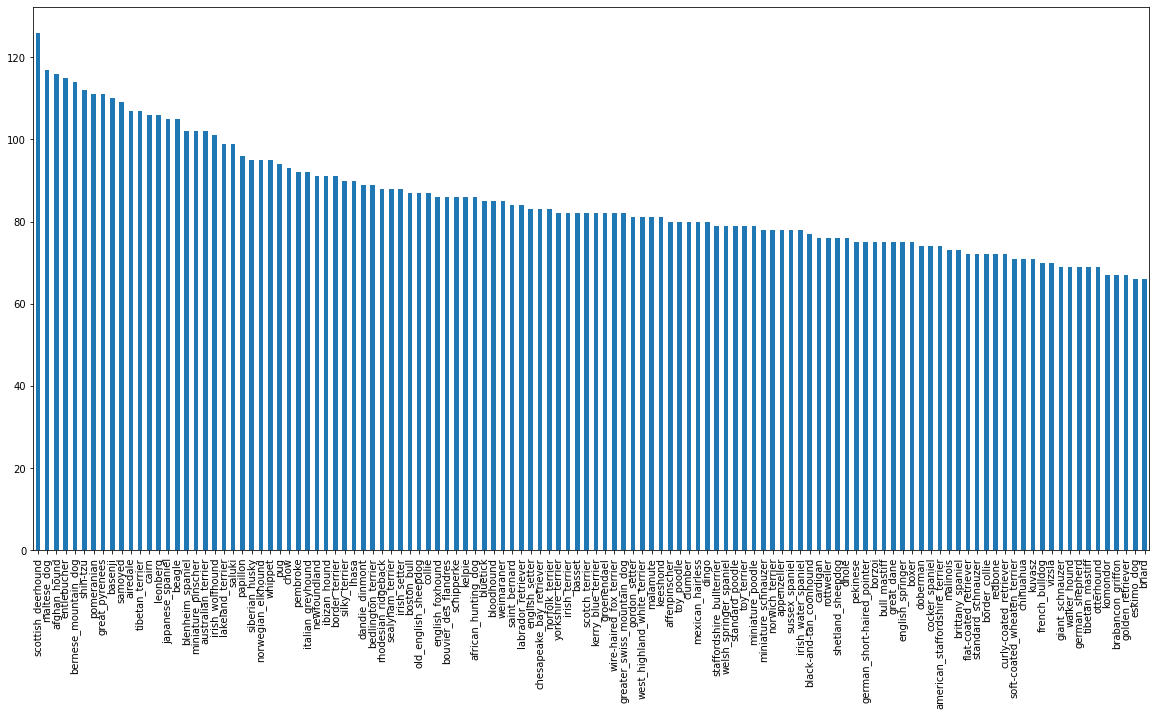

In [ ]:
labels_csv['breed'].value_counts(), labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
#median value of samples of each breed 
labels_csv['breed'].value_counts().median()

82.0

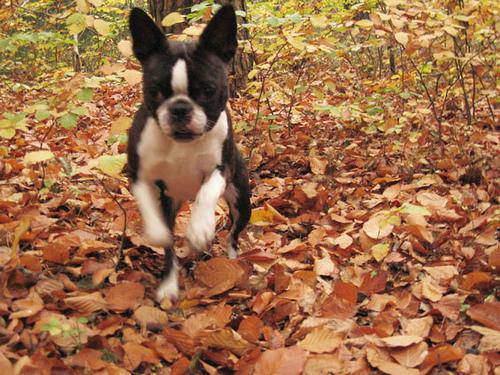

In [ ]:
#view an image
#!pip install ipython
from IPython.display import Image
Image('drive/My Drive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

###Getting images and their labels

In [ ]:
#a list of image ID's
filenames = [fname for fname in labels_csv['id']]
filenames[:5]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62']

In [ ]:
#a list of image paths
filenames = ['drive/My Drive/DogVision/train/' + fname + '.jpg' for fname in labels_csv['id']]
filenames[:5], len(filenames)

(['drive/My Drive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  'drive/My Drive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  'drive/My Drive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
  'drive/My Drive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  'drive/My Drive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg'],
 10222)

In [ ]:
#check the number of filenames match the number of actual image files
import os
if len(os.listdir('drive/My Drive/DogVision/train/')) == len(filenames):
  print('The number of filenames matches the actual number of files..YES!!We are good to go')
else:
  print("The number of filenames doesn't match..you need to check")

The number of filenames matches the actual number of files..YES!!We are good to go


In [ ]:
#turning labels into numbers
import numpy as np
labels = labels_csv['breed']
labels = np.array(labels)
len(labels), labels[:10]

(10222,
 array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
        'scottish_deerhound'], dtype=object))

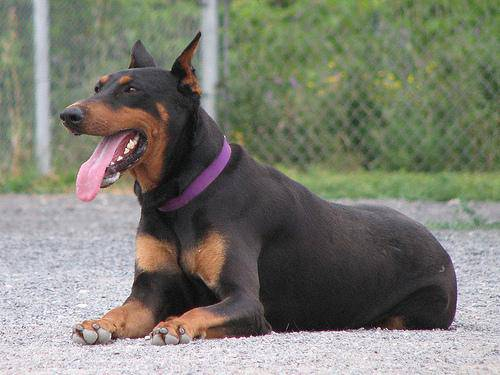

In [ ]:
#final check
Image(filenames[20])

In [ ]:
labels[20]

'doberman'

In [ ]:
# final comparision of numbers
if len(labels) == len(filenames):
  print("Matched")
else:
  print("Uhoh! Not matched")

Matched


In [ ]:
unique_breeds = np.unique(labels)
unique_breeds
#if its 120, then its a match as there are 120 breeds of dogs

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
#turn one label to boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#turn every label to boolean
boolean_labels = [label==unique_breeds for label in labels]
len(boolean_labels), boolean_labels[:2]

(10222, [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, Fa

###Creating our own validation sets and the X(input) and y(output)

In [ ]:
X = filenames
y = boolean_labels 
len(X), len(y)

(10222, 10222)

Since we are working on more than 10000 images, we will start experimenting with 1000 images to reduce the time between experiments

In [ ]:
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
from sklearn.model_selection import train_test_split

#splitting the data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                   y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
#checking the data
X_train[:2], y_train[:2]

(['drive/My Drive/DogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/DogVision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

###Preprocessing images

Since we're using TensorFlow, our data has to be in the form of Tensors.

We'll write a function to preprocess images:
1. Take image file as input
2. Read the file using tensorflow an dsave it to a variable 'image'
3. Turn the image to Tensors
4. Convert values of '0-225' to '0-1'
4. Resize the image(224, 224)
5. Return the image

In [ ]:
#convert the image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
#converting to tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
image = tf.io.read_file(filenames[42]) 
image
#tf.image.decode_jpeg(image)[:2]

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x01\x01^\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
# lets build a function for that
IMG_SIZE = 224
def preprocess_image(image_path):
  # read the file(turn to a tensor string)
  image = tf.io.read_file(image_path)
  # turn the image file to tensors
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to desired size(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

### Creating data batches

Batches must be in tuples of (image, label)

In [ ]:
# creating a function to make tuples along with the preprocessing images
def get_image_label(image_path, label):
  """ Returns a tuple by processing the image and its label
  """
  image = preprocess_image(image_path)
  return image, label

Now we will make data batches of 32

In [ ]:
BATCH_SIZE = 32
def create_data_batches(X, y, batch_size=BATCH_SIZE, test_data=False, valid_data=False):
  """
  Creates data batches of X(image), y(labels)
  Shuffles the data only for training data
  Accepts only inputs(X), for test data
  """
  # for test data we don't have labels
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(preprocess_image).batch(batch_size)
    return data_batch

  # for validation data
  elif valid_data:
    print("Creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  
  #for training data we'll shuffle
  else:
    print("Creating training data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

In [ ]:
# creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches
Creating validation data batches


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising the data batches

In [ ]:
import matplotlib.pyplot as plt 
 
# Create a function for viewing data batches

def show_32_images_batch(images, labels):
  """
  Display 32 images from a databatch
  """
  plt.figure(figsize=(16,8))
  for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

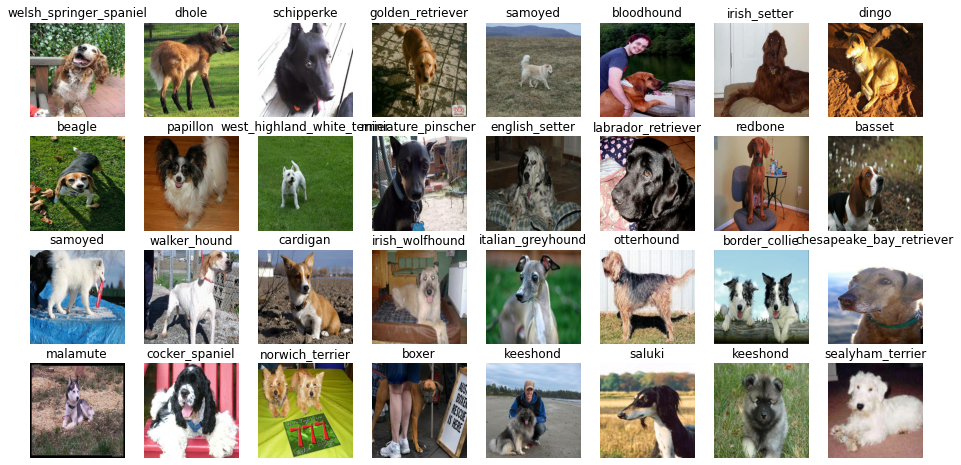

In [ ]:
# visualising the batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_32_images_batch(train_images, train_labels)

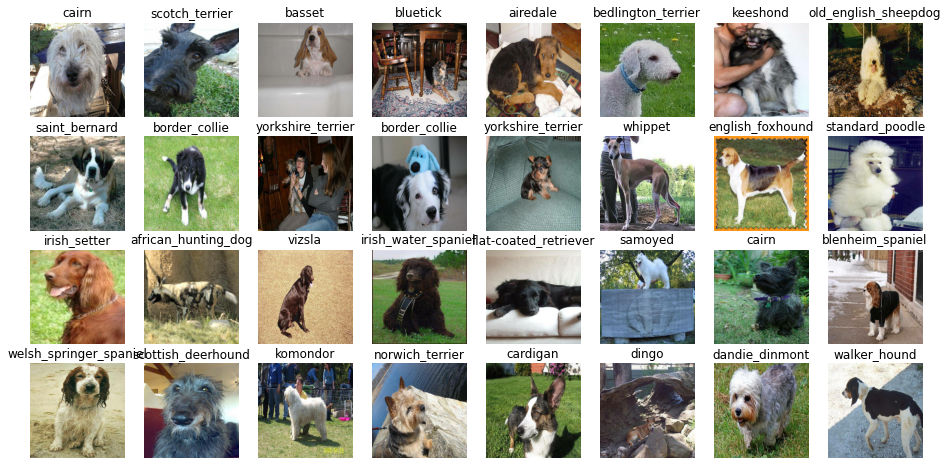

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_32_images_batch(val_images, val_labels)

## Choosing a pretrained model

The model used is [mobilenet_v2_130_224](https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4)

In [ ]:
# setup input shape
INPUT_SHAPE = [None, 224, 224, 3]
# setup output shape
OUTPUT_SHAPE = 120
# setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"

In [ ]:
# we will now setup the input and output layer using keras API
# creating a function to create keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(units=output_shape,
                                                     activation='softmax')
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build(input_shape)
  return model

In [ ]:
#create the model and check it's details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  4363712   
_________________________________________________________________
dense (Dense)                multiple                  215160    
Total params: 4,578,872
Trainable params: 215,160
Non-trainable params: 4,363,712
_________________________________________________________________


###Creating callbacks

We'll create two callbacks namely 'Tensorbaoard callback' and 'EarlyStopping callback'

In [ ]:
#load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/DogVision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# creatinf EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 100

# function to train model and return trained model
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Epoch 1/100
25/25 [==============================] - 643s 26s/step - loss: 4.1928 - accuracy: 0.1900 - val_loss: 3.0823 - val_accuracy: 0.3500
Epoch 2/100
25/25 [==============================] - 6s 244ms/step - loss: 1.3069 - accuracy: 0.7925 - val_loss: 1.7596 - val_accuracy: 0.6300
Epoch 3/100
25/25 [==============================] - 6s 242ms/step - loss: 0.4490 - accuracy: 0.9675 - val_loss: 1.4230 - val_accuracy: 0.6850
Epoch 4/100
25/25 [==============================] - 6s 243ms/step - loss: 0.2226 - accuracy: 0.9937 - val_loss: 1.2855 - val_accuracy: 0.7100
Epoch 5/100
25/25 [==============================] - 6s 244ms/step - loss: 0.1386 - accuracy: 1.0000 - val_loss: 1.2388 - val_accuracy: 0.7050
Epoch 6/100
25/25 [==============================] - 6s 242ms/step - loss: 0.1001 - accuracy: 1.0000 - val_loss: 1.2011 - val_accuracy: 0.7100
Epoch 7/100
25/25 [==============================

###Checking the Tensorboard logs
The '%tensoboard' magic function will access the logs folder and plot the status

In [ ]:
%tensorboard --logdir drive/My\ Drive/DogVision/logs

<IPython.core.display.Javascript object>

###Making and evaluating predictions

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

2/7 [=======>......................] - ETA: 21s

In [ ]:
predictions.shape

(200, 120)

In [ ]:
print('Max value of prediction', np.max(predictions[0]))
print('Sum', np.sum(predictions[0]))
print('Max index', np.argmax(predictions[0]))
print('Predicted label', unique_breeds[np.argmax(predictions[0])])

Max value of prediction 0.612349
Sum 1.0
Max index 26
Predicted label cairn


In [ ]:
# a function to return the breed name
def get_pred_label(prediction_probabilities):
  '''Turns an array of prediction to label'''
  return unique_breeds[np.argmax(prediction_probabilities)]


In [ ]:
get_pred_label(predictions[0])

Now we will compare the validation labels with validation predictions
But, as the data is in batches, we need to unbatchify it using unbatchify()

In [ ]:
def unbatch_data(data):
  '''Turns the batched data(image label) and creates separate arrays for image and labels'''
  images=[]
  labels=[]
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatch_data(val_data)
val_labels[0]

'cairn'

In [ ]:
get_pred_label(predictions[42]), val_labels[42]

('english_foxhound', 'english_foxhound')

In [ ]:
# create a function to plot probability along with the image
def plot_pred(prediction_prob, labels, images, n):
  pred_prob, true_label, image = prediction_prob[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:   
    color='green'
  else:
    color='red'
  
  plt.title('{} {:2.0f}% ({})'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

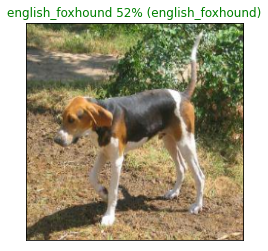

In [ ]:
plot_pred(predictions, val_labels, val_images, 42)

####Now, we will fing the top 10 predictions for a particular image
We need:
* Prediction values
* Prediction indexes
* Prediction labels

In [ ]:
# we'll define a function

def plot_top_10_pred(prediction_probabilities, labels, n):
  '''Plots the top 10 prediction along with label for sample "n"'''
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  
  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             top_10_pred_labels,
             rotation='vertical')
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
  else:
    pass

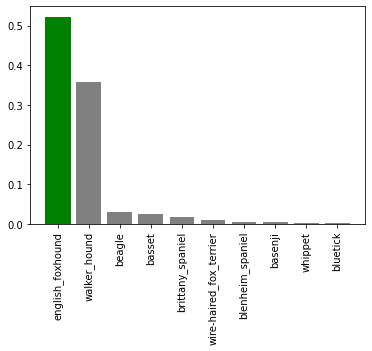

In [ ]:
plot_top_10_pred(predictions, val_labels, n=42)

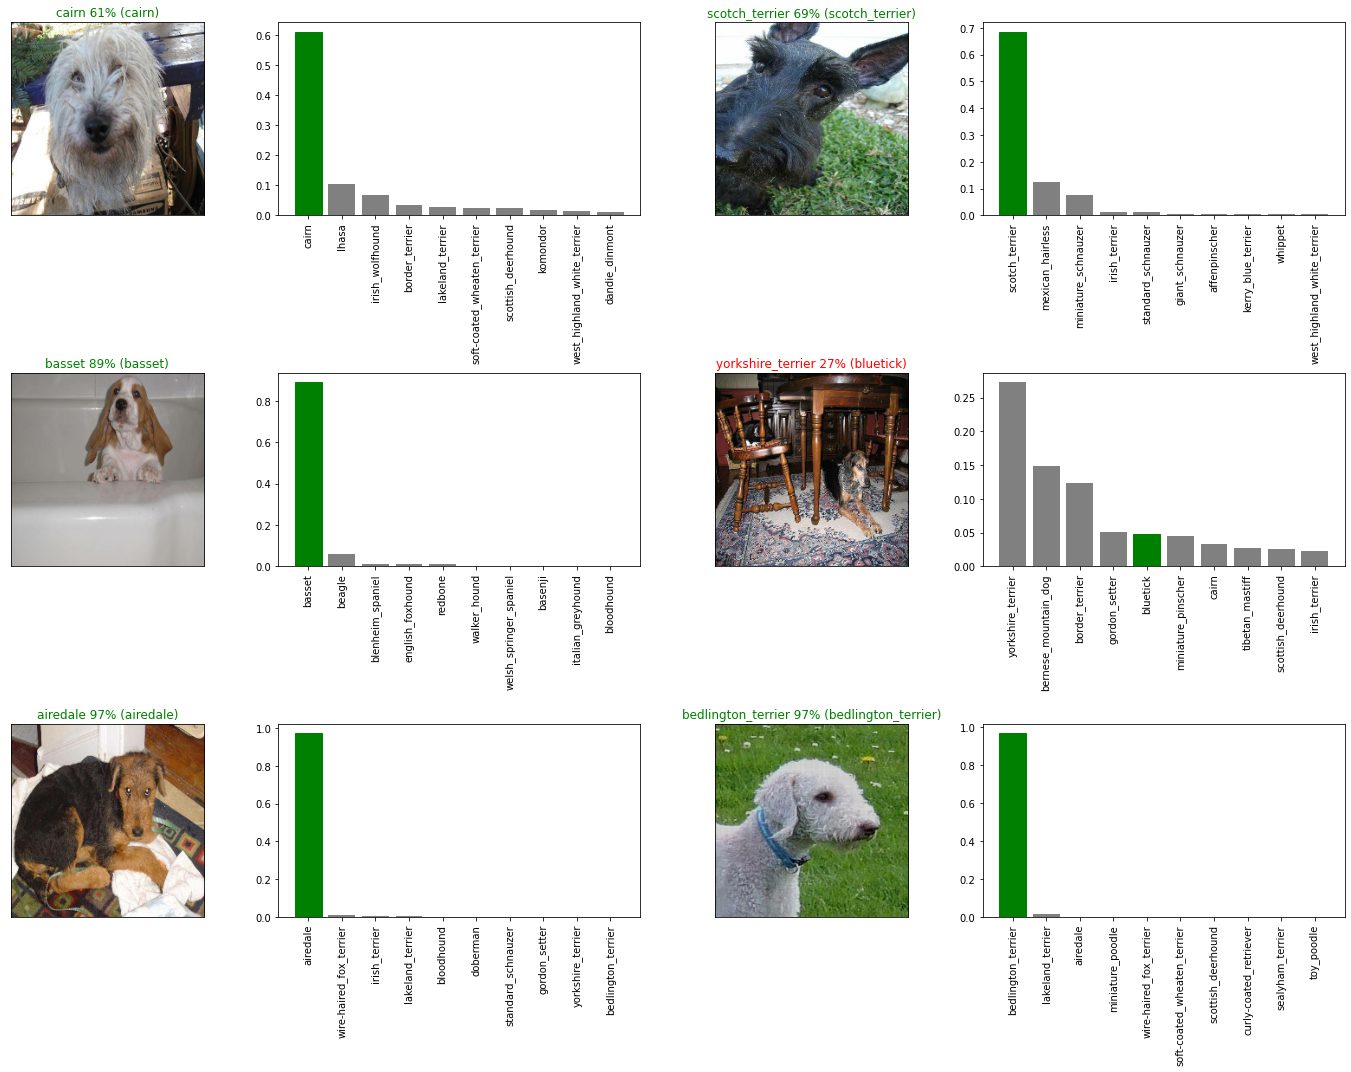

In [ ]:
# now lets check a few other predictions together

i_multiplier=0
n_rows=3
n_cols=2
n_images = n_rows*n_cols
plt.figure(figsize=(5*2*n_cols, 5*n_rows))
for i in range(n_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_pred(predictions, val_labels, val_images, i+i_multiplier)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_top_10_pred(predictions, val_labels, i+i_multiplier)
  plt.tight_layout(h_pad=1)
plt.show()

###Saving and reloading a model

In [ ]:
def save_model(model, suffix=None):
  '''Saves a model with the suffix(string) for clarity'''
  model_dir = os.path.join('drive/My Drive/models', datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = model_dir + '-' + suffix +'.h5'
  print('Saving model to', model_path)
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  '''Loads a saved model from a path'''
  print("Loading model from", model_path)
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
save_model(model, '1000-images-Adam')

Saving model to drive/My Drive/models/20200626-05181593148698-1000-images-Adam.h5


'drive/My Drive/models/20200626-05181593148698-1000-images-Adam.h5'

In [ ]:
model_1000_images = load_model('drive/My Drive/models/20200626-05181593148698-1000-images-Adam.h5')

Loading model from drive/My Drive/models/20200626-05181593148698-1000-images-Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 146ms/step - loss: 1.1349 - accuracy: 0.7050


[1.1348927021026611, 0.7049999833106995]

In [ ]:
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 147ms/step - loss: 1.1349 - accuracy: 0.7050


[1.1348927021026611, 0.7049999833106995]

# Training a model on full data



In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches


In [ ]:
#create model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4


In [ ]:
# creating callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_earlystopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                            patience=4)

In [ ]:
# we'll load tensorboard to monitor while its training

%tensorboard --logdir drive/My\ Drive/DogVision/logs

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
full_model.fit(x=full_data, 
               epochs=NUM_EPOCHS, 
               callbacks=[full_model_tensorboard, full_model_earlystopping])

Epoch 1/100
320/320 [==============================] - 4031s 13s/step - loss: 1.1993 - accuracy: 0.7048
Epoch 2/100
320/320 [==============================] - 76s 237ms/step - loss: 0.3458 - accuracy: 0.9036
Epoch 3/100
320/320 [==============================] - 74s 232ms/step - loss: 0.1981 - accuracy: 0.9515
Epoch 4/100
320/320 [==============================] - 74s 231ms/step - loss: 0.1194 - accuracy: 0.9788
Epoch 5/100
320/320 [==============================] - 74s 230ms/step - loss: 0.0799 - accuracy: 0.9883
Epoch 6/100
320/320 [==============================] - 74s 232ms/step - loss: 0.0571 - accuracy: 0.9950
Epoch 7/100
320/320 [==============================] - 74s 232ms/step - loss: 0.0428 - accuracy: 0.9977
Epoch 8/100
320/320 [==============================] - 74s 230ms/step - loss: 0.0332 - accuracy: 0.9984
Epoch 9/100
320/320 [==============================] - 74s 231ms/step - loss: 0.0266 - accuracy: 0.9989
Epoch 10/100
320/320 [==============================] - 74s 232m

In [ ]:
save_model(full_model, 'all-images-Adam')

Saving model to drive/My Drive/models/20200626-06581593154726-all-images-Adam.h5


'drive/My Drive/models/20200626-06581593154726-all-images-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/My Drive/models/20200626-06581593154726-all-images-Adam.h5')

Loading model from drive/My Drive/models/20200626-06581593154726-all-images-Adam.h5


# Making Predictions on the test dataset

In [ ]:
# load test images and make an array
test_dir = 'drive/My Drive/DogVision/test/'
test_filenames = [test_dir + fname for fname in os.listdir(test_dir)]
test_filenames[:10]

In [ ]:
len(test_filenames)

10357

In [ ]:
#create data batches 
test_data = create_data_batches(test_filenames, y=None, test_data=True)

Creating test data batches


In [ ]:
# make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 4488s 14s/step


In [ ]:
test_predictions[:10]

array([[1.2746684e-09, 4.0799133e-08, 4.3401140e-08, ..., 3.3887893e-06,
        1.3540982e-07, 4.3430100e-09],
       [4.1632116e-08, 1.4959423e-11, 5.8304908e-09, ..., 4.6663732e-07,
        3.8974004e-08, 1.4495258e-07],
       [1.0942253e-07, 4.9399751e-09, 1.6357906e-07, ..., 6.4642038e-08,
        4.0853251e-06, 4.6999179e-07],
       ...,
       [2.4590000e-07, 1.1139697e-08, 1.2736452e-08, ..., 1.9404802e-09,
        3.0472641e-10, 1.7660804e-04],
       [3.4896046e-09, 2.7377371e-09, 1.6588628e-09, ..., 2.0016653e-09,
        7.5379603e-08, 4.6299005e-04],
       [7.7332336e-09, 5.2899041e-10, 1.0817747e-08, ..., 4.0437311e-09,
        1.3199518e-07, 1.4504938e-07]], dtype=float32)

## Preparing test data set for kaggle

In [ ]:
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# append test imade ids
test_dir = 'drive/My Drive/DogVision/test/'
preds_df.id = [os.path.splitext(path)[0] for path in os.listdir(test_dir)]
preds_df.head()

id  ... yorkshire_terrier
0  eb8473f9fc102c45e0c0abd07de20a2a  ...               NaN
1  eeb2c4ba7170968ce151916667c450a3  ...               NaN
2  ed574861296d0946948a4225e60e8d75  ...               NaN
3  f1c1f35ca91cd9d007f957da29aa087e  ...               NaN
4  e9fe358382731f9288768526be01c950  ...               NaN

[5 rows x 121 columns]

In [ ]:
preds_df.shape

(10357, 121)

In [ ]:
# add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  eb8473f9fc102c45e0c0abd07de20a2a  ...       4.34301e-09
1  eeb2c4ba7170968ce151916667c450a3  ...       1.44953e-07
2  ed574861296d0946948a4225e60e8d75  ...       4.69992e-07
3  f1c1f35ca91cd9d007f957da29aa087e  ...       1.31788e-11
4  e9fe358382731f9288768526be01c950  ...       1.36993e-09

[5 rows x 121 columns]

In [ ]:
# save to csv file
preds_df.to_csv('drive/My Drive/DogVision/full_submission_1_mobilienetV2_adam.csv',
                index=False)

# Making Predictions on Custom Dataset
The steps included are:
  * Get the file paths
  * creaye data batches using 'create_data_batches()' considering it to be test data
  * Pass the databatch to 'predict()' function
  * Convert probabilities to labels
  * Compare labels to images

The custom data will be uploaded in the 'drive/My Drive/DogVision/custom images'

In [ ]:
import os

In [ ]:
# create path
custom_path =  'drive/My Drive/DogVision/custom images/'
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# create data batches
custom_data = create_data_batches(custom_image_path, y=None, test_data=True)

Creating test data batches


In [ ]:
#making predictions on custom data
custom_pred = loaded_full_model.predict(custom_data)

In [ ]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
for i in range(len(custom_images)):
  pass
++i  

1

In [ ]:
# function to plot custom predictions
def plot_custom_predictions(prediction_probabilities, custom_images):
  for l in range(len(custom_images)):
    pass
  no_of_images = l+1  
  plt.figure(figsize=(5*2, 5*(no_of_images)))
  for i, images in enumerate(custom_images):
    pred = prediction_probabilities[i]
    top_10_indexes = pred.argsort()[-10:][::-1]
    top_10_values = pred[top_10_indexes]
    top_10_labels =unique_breeds[top_10_indexes]

    plt.subplot(no_of_images, 2, 2*i+1)
    plt.imshow(custom_images[i])
    plt.xticks([])
    plt.yticks([])
  
    plt.subplot(no_of_images, 2, 2*i+2)
    plt.bar(np.arange(len(top_10_labels)),
            top_10_values)
    plt.xticks(np.arange(len(top_10_labels)),
               labels=top_10_labels,
               rotation='vertical')

  plt.tight_layout(h_pad=1.0)
  plt.show()

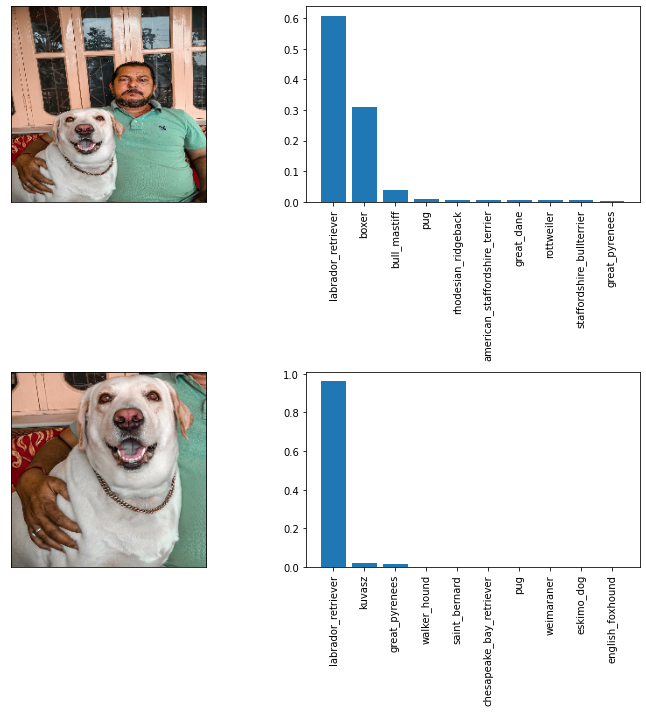

In [ ]:
plot_custom_predictions(custom_pred, custom_images)